In [94]:
!pip install mne

In [95]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy.signal import butter, lfilter
from scipy.signal import spectrogram

Band pass filter with cut-off 0.5-50 Hz.

In [96]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band',analog=True)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [140]:
def cleanAndRaw(filePath):

    good_channels = ['EEG FP1-REF','EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF','EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']
    good_channels = set(good_channels)

    eeg = mne.io.read_raw_edf(filePath)
    eeg = eeg.resample(100, npad='auto')  

    channels = eeg.info.ch_names

    eeg_19 = eeg.copy()
    for channel in channels:

        if channel not in good_channels:

            eeg_19.drop_channels([channel])

    raw_eeg = eeg_19.get_data()

    if raw_eeg.shape[0] == 19 and raw_eeg.shape[1] >= 36000:

        raw_eeg  = raw_eeg - raw_eeg.mean(axis=1,keepdims=True)

        fs = 100
        lowcut = 0.5
        highcut = 50

        t = np.arange(0,raw_eeg.shape[1],1)
        for i in range(19):
            raw_eeg[i] = butter_bandpass_filter(raw_eeg[i], lowcut, highcut, fs, order=5)


        raw_eeg = np.delete(raw_eeg,np.s_[:600], axis=1)    
        raw_eeg = np.delete(raw_eeg,np.s_[30000:], axis=1)    

        return raw_eeg

    else:

        return None

In [131]:
raw = cleanAndRaw('/content/00000124_s007_t022.edf')

Extracting EDF parameters from /content/00000124_s007_t022.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


(19, 30000)

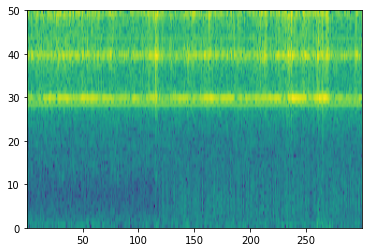

In [139]:
channel_spec1 = plt.specgram(raw[6],Fs=100,NFFT=128,noverlap=32)